# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

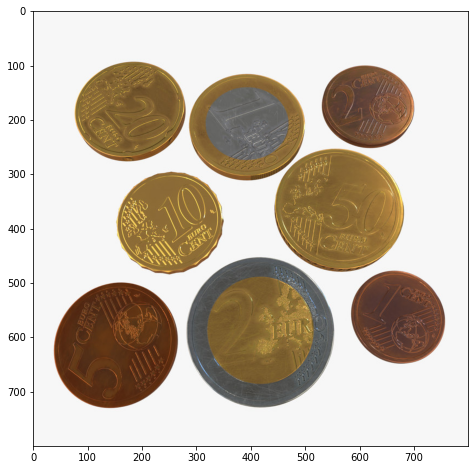

In [223]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins)

In [224]:
# Convert the image above to grayscale
gray_coins = cv2.cvtColor(rgb_coins,cv2.COLOR_RGB2GRAY)


# Apply some gaussian blur to it (try differente size kernels)

kernel=np.ones((3,3),np.float32)/27
blurred = cv2.filter2D(gray_coins,-1,kernel)


# Apply Canny to find edges and display the image 
canny = cv2.Canny(blurred, 30, 150)
cv2.imshow("blur",canny)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

In [225]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?

gray_coins = cv2.cvtColor(rgb_coins,cv2.COLOR_RGB2GRAY)
gray_coins_inv = cv2.bitwise_not(gray_coins)
contours, h = cv2.findContours(gray_coins,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

coins_countours = rgb_coins.copy()

cv2.drawContours(coins_countours,contours,-1,(0,0,255),2)
cv2.imshow("with countours",coins_countours)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)




-1

In [243]:
#ret , th = cv2.threshold(gray_coins,244,255,cv2.THRESH_BINARY_INV)

#contours, h = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

contours, h = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

coins_countours = rgb_coins.copy()

cv2.drawContours(coins_countours,contours,-1,(0,0,255),2)
cv2.imshow("with countours",coins_countours)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)



-1

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [38]:
# print the number of contours that has been found
sorted_contours = sorted(contours,key=cv2.contourArea, reverse=True)
len(sorted_contours)

1101

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

In [229]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise

my_image = cv2.imread("/home/umut/Documents/GitHub/Strive_School/Computer_Vision_(Module_6)/Day_3_ Histograms_transformations_and_Bitwise_ops/img/day1.jpg",cv2.IMREAD_COLOR)

my_image_rgb = cv2.cvtColor(my_image,cv2.COLOR_BGR2RGB)

my_image_gray = cv2.cvtColor(my_image_rgb,cv2.COLOR_RGB2GRAY)

ret , th = cv2.threshold(my_image_gray,244,255,cv2.THRESH_BINARY_INV)

contours, h = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
my_image_countours = my_image_rgb.copy()

cv2.drawContours(my_image_countours,contours,-1,(0,0,255),2)
cv2.imshow("with countours",my_image_countours)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)





-1

## Sorting Contours

### By area

In [45]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [192]:
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),key=lambda b: b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)


In [178]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var

results= get_contour_areas(contours)




In [197]:
# Print the contour areas to screen
print(results)




[41201.5, 41004.5, 23172.5, 23028.5, 218.5, 28.5, 45.5, 75.0, 22.0, 82.5, 207.0, 160.0, 20347.5, 20214.5, 16.5, 29257.0, 29103.0]


In [187]:
# Now sort the areas by biggest to smallest and print the sorted areas
sorted_contours_biggest = sorted(contours,key=cv2.contourArea, reverse=True)


[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [188]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas
sorted_contours_smallest = sorted(contours,key=cv2.contourArea, reverse=False)


In [189]:
# Filter out only the 5 biggest contours and print them
sorted_five = sorted_contours_biggest[0:5]

In [200]:
len(sorted_five)
five = contours[0:5]

[Hint](# "Just slice the array!") 

In [236]:
# Now in a clean image draw the contours you just filtered out and display it
coins=rgb_coins.copy()

accuracy = 0.3



#contours, h = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)





#for countour,i in  enumerate(contours): 
#for countour in sorted_five:    
#    perimeter = cv2.arcLength(countour, True)
#    epsilon = accuracy * perimeter
#    approx = cv2.approxPolyDP(countour,epsilon,True)

#    cv2.drawContours(coins,[approx],0,(0,0,255),2)

    #cv2.circle(coins,(centers[i][0],centers[i][1]),30,(0,0,255),2)
    
contours, h = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

coins_countours = rgb_coins.copy()


cv2.drawContours(coins_countours,five,-1,(0,0,255),2)

cv2.imshow("",coins_countours)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

-1

In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [191]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [239]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right

left =sort_contours(five, method="left-to-right")


In [242]:
# Draw the contours one at a time and display the images on screen 


coins_countours = rgb_coins.copy()


cv2.drawContours(coins_countours,five,-1,(0,0,255),2)

cv2.imshow("",coins_countours)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
